<a href="https://colab.research.google.com/github/JoseLuisPalominoMarmol/lenguaje_claro_cyc_2/blob/main/volumetr%C3%ADa/lecturabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cálculo de lecturabilidad de un sitio web

Con este código vamos a bajarnos el texto de un sitio web y a calcular su lecturabilidad de acuerdo con la fórmula de Fernández Huerta.

In [1]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.0 MB/s eta 0:00:00


In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Define la función de limpieza de texto
def clean_text(text):
    """Esta función toma un texto y realiza una limpieza preliminar como eliminar espacios dobles o saltos de línea."""
    text = text.replace('\n', ' ')  # Elimina saltos de línea
    text = re.sub(' +', ' ', text)  # Elimina espacios dobles
    return text

# URL del sitio web
url = 'https://www.sspa.juntadeandalucia.es/servicioandaluzdesalud/'

# Descargamos los textos y los guardamos en una tabla
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Extraemos todos los enlaces de la página
links = []
for link in soup.find_all('a'):
    links.append(link.get('href'))

texts = []
for link in links[0:10]:  # Usamos un índice para probar con los primeros 10 enlaces.
    if link is not None:
        full_url = url + link
        response = requests.get(full_url)
        soup = BeautifulSoup(response.content, 'html.parser')
        # Extraemos todo el texto de la página
        text = soup.get_text()

        # Limpiamos el texto usando la función definida
        if text:
            clean_text_result = clean_text(text)  # Llamada a la función clean_text para limpiar el texto
            texts.append(clean_text_result)
        else:
            texts.append("")  # Añade una cadena vacía cuando no se encuentra texto

# Creamos un DataFrame para almacenar los enlaces y los textos limpios
df = pd.DataFrame()
df['links'] = pd.Series(links[:10])  # Asegúrate de que coincida con el número de textos extraídos
df['texts'] = pd.Series(texts)

# Mostrar el DataFrame
print(df)


                                               links  \
0                   https://www.juntadeandalucia.es/   
1  https://www.sspa.juntadeandalucia.es/servicioa...   
2  https://www.sspa.juntadeandalucia.es/servicioa...   
3  https://www.sspa.juntadeandalucia.es/servicioa...   
4  https://www.sspa.juntadeandalucia.es/servicioa...   
5  https://www.sspa.juntadeandalucia.es/servicioa...   
6  https://www.sspa.juntadeandalucia.es/servicioa...   
7  https://www.sspa.juntadeandalucia.es/servicioa...   
8  https://www.sspa.juntadeandalucia.es/servicioa...   
9  https://www.sspa.juntadeandalucia.es/servicioa...   

                                               texts  
0   Página no encontrada | Servicio Andaluz de Sa...  
1   Página no encontrada | Servicio Andaluz de Sa...  
2   Página no encontrada | Servicio Andaluz de Sa...  
3   Página no encontrada | Servicio Andaluz de Sa...  
4   Página no encontrada | Servicio Andaluz de Sa...  
5   Página no encontrada | Servicio Andaluz de Sa... 

In [12]:
df.dropna() #eliminamos filas vacías

,links,texts
0,https://www.juntadeandalucia.es/,Página no encontrada | Servicio Andaluz de Sa...
1,https://www.sspa.juntadeandalucia.es/servicioa...,Página no encontrada | Servicio Andaluz de Sa...
2,https://www.sspa.juntadeandalucia.es/servicioa...,Página no encontrada | Servicio Andaluz de Sa...
3,https://www.sspa.juntadeandalucia.es/servicioa...,Página no encontrada | Servicio Andaluz de Sa...
4,https://www.sspa.juntadeandalucia.es/servicioa...,Página no encontrada | Servicio Andaluz de Sa...
5,https://www.sspa.juntadeandalucia.es/servicioa...,Página no encontrada | Servicio Andaluz de Sa...
6,https://www.sspa.juntadeandalucia.es/servicioa...,Página no encontrada | Servicio Andaluz de Sa...
7,https://www.sspa.juntadeandalucia.es/servicioa...,Página no encontrada | Servicio Andaluz de Sa...
8,https://www.sspa.juntadeandalucia.es/servicioa...,Página no encontrada | Servicio Andaluz de Sa...
9,https://www.sspa.juntadeandalucia.es/servicioa...,Página no encontrada | Servicio Andaluz de Sa...


In [13]:
#Calculamos número de oraciones por página y lecturabilidad
df['num oraciones'] = df['texts'].astype(str).apply(lambda x: textstat.sentence_count(x) if x else 0)
df['num palabras'] = df['texts'].astype(str).apply(lambda x: textstat.lexicon_count(x, removepunct=True) if x else 0)
df['palabras/oración'] = df['num palabras'].divide(df['num oraciones'])
df['fdz huerta'] = df['texts'].astype(str).apply(lambda x: textstat.fernandez_huerta(x) if x else 0)
df['tiempo lectura'] = df['texts'].astype(str).apply(lambda x: textstat.reading_time(x, ms_per_char=14.69) if x else 0)
df.head()


,links,texts,num oraciones,num palabras,palabras/oración,fdz huerta,tiempo lectura
0,https://www.juntadeandalucia.es/,Página no encontrada | Servicio Andaluz de Sa...,493,6593,13.373225,67.17,682.54
1,https://www.sspa.juntadeandalucia.es/servicioa...,Página no encontrada | Servicio Andaluz de Sa...,493,6593,13.373225,67.17,682.54
2,https://www.sspa.juntadeandalucia.es/servicioa...,Página no encontrada | Servicio Andaluz de Sa...,493,6593,13.373225,67.17,682.54
3,https://www.sspa.juntadeandalucia.es/servicioa...,Página no encontrada | Servicio Andaluz de Sa...,493,6593,13.373225,67.17,682.54
4,https://www.sspa.juntadeandalucia.es/servicioa...,Página no encontrada | Servicio Andaluz de Sa...,493,6593,13.373225,67.17,682.54


In [14]:
df['texts'][0]

' Página no encontrada | Servicio Andaluz de Salud El SASEl Servicio Andaluz de SaludDatos básicos. HistóricoServicios y centrosAtención primaria de saludAtención hospitalariaRed Andaluza de Medicina Transfusional, Tejidos y CélulasSalud mentalPrevención del suicidioSalud y bienestar emocionalIII Plan Integral de Salud Mental 2016-2020 (en revisión)Salud mental. Red de recursosSalud mental. Derechos y recuperaciónSalud mental. Documentos recomendadosGuías y consejosGuías de información y consejo sobre psicosis y esquizofreniaUrgencias y emergenciasTrasplantesRed Coordinación de Trasplantes de AndalucíaCentros autorizados para la extracción y/o el trasplantePremio periodístico Luis PorteroCursos de formación en donación y trasplantesSalud RespondeInformación por centrosMapa de servicios sanitarios públicos de AndalucíaCertificación y acreditaciónCentros y servicios sanitarios concertados en AndalucíaContrato programaPlanes marco y estrategiasPlanes integralesProtección de datosPreguntas

<Axes: >

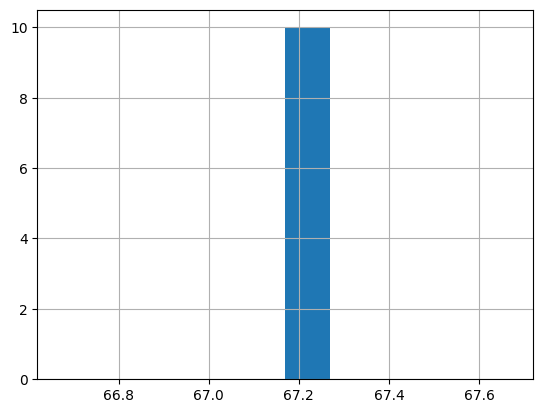

In [15]:
df['fdz huerta'].hist()

In [16]:
#Guardamos la tabla en un fichero csv
df.to_csv("sas.csv")

In [17]:
print ('media de oraciones por archivo:')
print (round (df['num oraciones'].mean(),0))
print ('media de nivel de lectura:')
print(round(df['fdz huerta'].mean(), 0))
print ('media de tiempo de lectura (segundos):')
print(round(df['tiempo lectura'].mean(), 0))



media de oraciones por archivo:
493.0
media de nivel de lectura:
67.0
media de tiempo de lectura (segundos):
683.0


<Axes: >

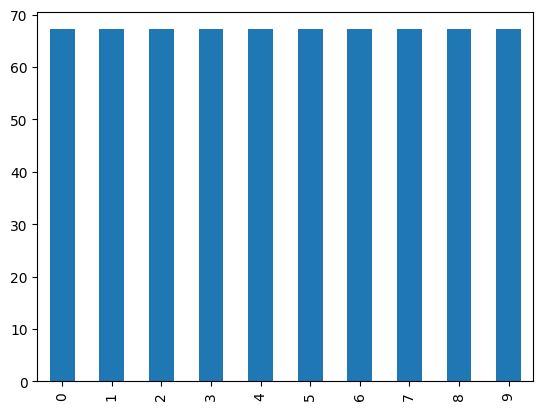

In [18]:
df['fdz huerta'].plot.bar()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a2326c74-8155-424a-a9ea-889ef1bb8e18' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>